## Importing libraries and data


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [4]:
# Create project folder path
path=r'C:\Users\Bori\Documents\Careerfoundry\Happiness\01 Data'

In [5]:
# Import data

df = pd.read_csv(os.path.join(path, 'Prepared Data', 'happiness_income_flags.csv'))

## Data cleaning

**Q3** This data has been cleaned in previous exercises, I will have to address missing values because they can cause problem for regression models.

In [6]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Country,Happiness Rank,Happiness Score,GDP per capita,Social support,Health (Life Expectancy),Freedom,Perceptions of corruption,Generosity,Year,Income category
0,0,0.0,Switzerland,1.0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015.0,Middle income
1,1,1.0,Iceland,2.0,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015.0,Middle income
2,2,2.0,Denmark,3.0,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015.0,Middle income
3,3,3.0,Norway,4.0,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015.0,Middle income
4,4,4.0,Canada,5.0,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015.0,Middle income


In [7]:
#Checking for missing values
df.isnull().sum()

Unnamed: 0.1                   0
Unnamed: 0                     2
Country                        2
Happiness Rank               441
Happiness Score              441
GDP per capita                 2
Social support                 2
Health (Life Expectancy)       3
Freedom                        2
Perceptions of corruption      3
Generosity                     2
Year                           2
Income category                2
dtype: int64

In [8]:
df_nan =df[df['Health (Life Expectancy)'].isnull() == True]

In [9]:
df_nan.head(30)

,Unnamed: 0.1,Unnamed: 0,Country,Happiness Rank,Happiness Score,GDP per capita,Social support,Health (Life Expectancy),Freedom,Perceptions of corruption,Generosity,Year,Income category
385,"385,385,""Hong Kong S.A.R., China"",71.0,5.47200...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1208,"1208,1208,""Eswatini, Kingdom of*"",125.0,4.396,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1328,1328,1328.0,State of Palestine,NaN,NaN,1.144,1.309,NaN,0.416,0.067,0.065,2023.0,Middle income


In [10]:
df.dropna(subset = ['Health (Life Expectancy)'], inplace = True)

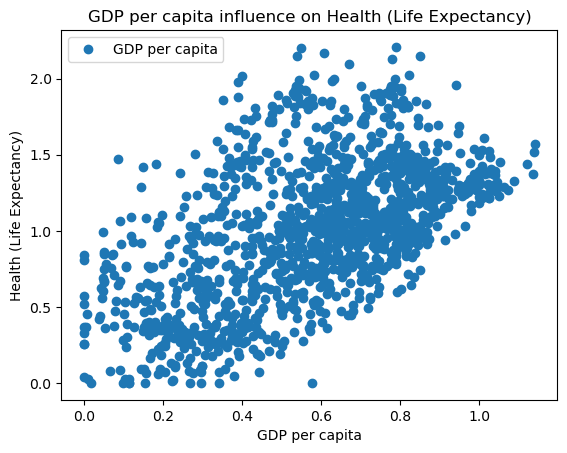

In [11]:
# Create a scatterplot for the "Happiness Score" and "GDP per capita" columns in seaborn


df.plot(x = 'Health (Life Expectancy)', y= 'GDP per capita' ,style='o') 
plt.title('GDP per capita influence on Health (Life Expectancy)')  
plt.xlabel('GDP per capita')  
plt.ylabel('Health (Life Expectancy)')  
plt.show()

**Hyphotesis: The higher the GDP per capita, the higher the Health (Life Expectancy) will be.**

## Prepare variables for regression

In [12]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['GDP per capita'].values.reshape(-1,1)
y = df['Health (Life Expectancy)'].values.reshape(-1,1)

In [13]:
X

array([[1.39651],
       [1.30232],
       [1.32548],
       ...,
       [0.67   ],
       [1.417  ],
       [0.645  ]])

In [14]:
y

array([[0.94143],
       [0.94784],
       [0.87464],
       ...,
       [0.092  ],
       [0.398  ],
       [0.087  ]])

In [15]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Regression analysis

In [16]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [17]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [18]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

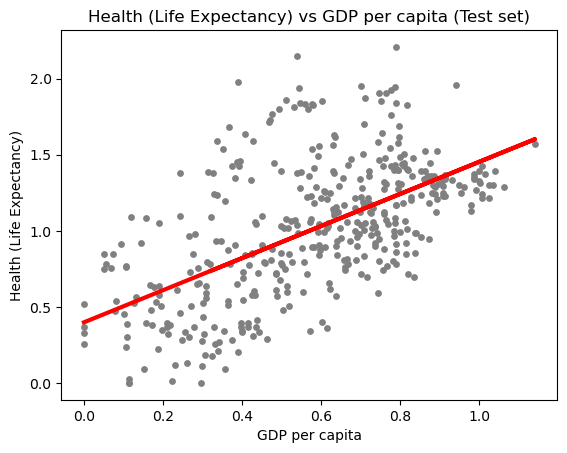

In [63]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Health (Life Expectancy) vs GDP per capita (Test set)')
plot_test.xlabel('GDP per capita')
plot_test.ylabel('Health (Life Expectancy)')
plot_test.show()

In [64]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [65]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.05496007]]
Mean squared error:  0.1333956265196086
R2 score:  0.33341753531580565


**The MSE is quite low, but the R2 score is low too (ca. 33%) which indicates a poor fit of a model.

In [72]:
y_predicted

array([[0.73811462],
       [1.22656114],
       [0.59991486],
       [1.25462307],
       [0.85597476],
       [0.76496336],
       [1.27778169],
       [0.75182911],
       [0.67441614],
       [0.94594176],
       [1.49135611],
       [0.65582774],
       [0.90479832],
       [0.71843962],
       [0.71470506],
       [0.8577471 ],
       [1.03312366],
       [1.14076123],
       [1.09634742],
       [1.26031986],
       [1.02506376],
       [0.84783047],
       [1.09996593],
       [1.10418577],
       [0.91429296],
       [1.31412282],
       [0.51024325],
       [1.11051553],
       [0.9502038 ],
       [1.20415378],
       [1.20018713],
       [0.85182181],
       [0.77125061],
       [0.7136568 ],
       [0.83939079],
       [1.3278373 ],
       [1.12633993],
       [1.13688953],
       [1.01029432],
       [0.71645629],
       [0.94530024],
       [0.6909802 ],
       [1.05635388],
       [1.33358684],
       [1.25366952],
       [1.35632123],
       [1.31978796],
       [1.237

In [73]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,1.094000,0.738115
1,1.400000,1.226561
2,0.578000,0.599915
3,1.061660,1.254623
4,1.060240,0.855975
5,0.932870,0.764963
6,1.480633,1.277782
7,0.932000,0.751829
8,0.132700,0.674416
9,0.845000,0.945942


### Compare how the regression fits the training set

In [74]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [75]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [70]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.05496007]]
Mean squared error:  0.14287523821287826
R2 score:  0.31427801214988604


**MSE is quite low, and R2 score us also low (ca. 31%) this indicates that I did not overfit the model, but also indicates that the relationship is not purely linear.**

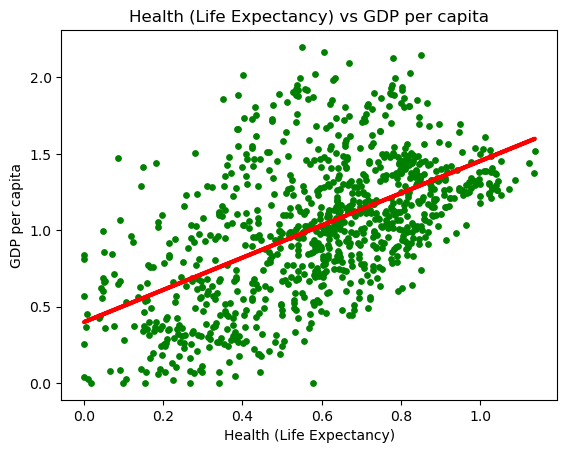

In [77]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Health (Life Expectancy) vs GDP per capita')
plot_test.xlabel('Health (Life Expectancy)')
plot_test.ylabel('GDP per capita')
plot_test.show()